In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.option_context('display.max_columns',None)
pd.option_context('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')

In [4]:
movies_df = pd.read_csv('movies.dat' , delimiter = '::' , names = ['MovieID' , 'Title' , 'Genres'],encoding='latin-1')
ratings_df = pd.read_csv('ratings.dat' , delimiter = '::' , names = ['UserID' , 'MovieID' , 'Rating' , 'Timestamp'],encoding='latin-1' )
users_df = pd.read_csv('users.dat' , delimiter = '::' , names = ['UserID' , 'Gender' , 'Age' ,'Occupation' ,'Zip_code'],encoding='latin-1')

In [5]:
# Merging movies_df and ratings_df
movie_ratings = pd.merge(movies_df,ratings_df,on='MovieID')

In [ ]:
# Merging users_df and mov_rating
Master_Data = pd.merge(movie_ratings,users_df,on='UserID')

In [ ]:
# Display master data
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


Text(0.5, 0, 'Age')

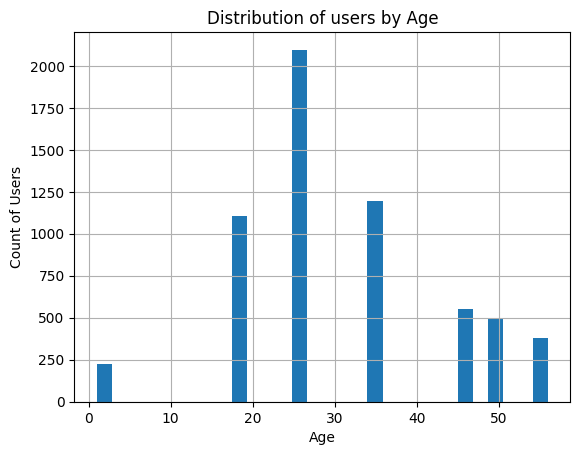

In [ ]:
# User Age Distribution
users_by_age = Master_Data[['UserID','Age', 'Gender']].drop_duplicates()
users_by_age['Age'].hist(bins=30)
plt.title('Distribution of users by Age')
plt.ylabel('Count of Users')
plt.xlabel('Age')

<Axes: title={'center': 'Distribution of User Ratings for Toy Story'}, xlabel='Rating', ylabel='Count of Users'>

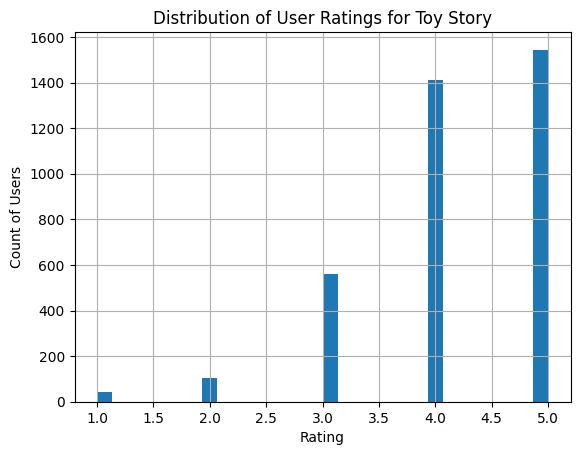

In [ ]:
# User rating of the movie “Toy Story”
ToyStoryRating = Master_Data[Master_Data['Title'].str.contains('Toy Story')]['Rating']
plt.title('Distribution of User Ratings for Toy Story')
plt.ylabel('Count of Users')
plt.xlabel('Rating')
ToyStoryRating.hist(bins=30)

In [ ]:
# Top 25 movies by viewership rating
most_rated = Master_Data.groupby('Title').size().sort_values(ascending=False)[:25]
print("\nTop 25 movies by viewership rating\n\n",most_rated)


Top 25 movies by viewership rating

 Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)

In [ ]:
# Ratings for all the movies reviewed by user with userID 2696
user_2696 = Master_Data[Master_Data['UserID']==2696]
print("\nRatings for movies rated by user 2696:\n")
print(user_2696[['Title','Rating']])


Ratings for movies rated by user 2696:

                                                 Title  Rating
991035                              Client, The (1994)       3
991036                                Lone Star (1996)       5
991037                           Basic Instinct (1992)       4
991038               E.T. the Extra-Terrestrial (1982)       3
991039                             Shining, The (1980)       4
991040                       Back to the Future (1985)       2
991041                                 Cop Land (1997)       3
991042                        L.A. Confidential (1997)       4
991043                                Game, The (1997)       4
991044          I Know What You Did Last Summer (1997)       2
991045                    Devil's Advocate, The (1997)       4
991046  Midnight in the Garden of Good and Evil (1997)       4
991047                                 Palmetto (1998)       4
991048                              Wild Things (1998)       4
991049        

In [ ]:
# unique genres
unique_genres=set()
for i in Master_Data['Genres'].str.split('|'):
    unique_genres=unique_genres.union(i)
unique_genres=sorted(list(unique_genres))
print(unique_genres)

['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [ ]:
# one-hot encoding for genres
for genre in unique_genres:
    Master_Data[genre] = Master_Data['Genres'].apply(lambda x: 1 if genre in x else 0)
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip_code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Determine the features affecting the ratings of any particular movie.
Master_Data.corr()

,MovieID,UserID,Rating,Timestamp,Age,Occupation,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,1.000000,-0.017739,-0.064042,0.041632,0.027575,0.008585,-0.042046,-0.082413,-0.014177,-0.071589,...,-0.018792,-0.019655,0.057613,-0.059381,-0.028561,-0.118375,-0.011747,-0.058418,-0.081951,0.003940
UserID,-0.017739,1.000000,0.012303,-0.490383,0.034688,-0.026698,-0.002023,-0.000683,-0.007665,-0.004862,...,0.002212,0.004701,-0.001392,-0.000222,0.004334,0.006834,-0.003283,-0.001107,0.003502,0.004114
Rating,-0.064042,0.012303,1.000000,-0.026770,0.056869,0.006753,-0.047633,-0.036718,0.019670,-0.039829,...,-0.023312,0.060259,-0.094353,0.015643,0.015848,0.009644,-0.044487,-0.004806,0.075688,0.007311
Timestamp,0.041632,-0.490383,-0.026770,1.000000,-0.064562,0.015646,-0.032990,-0.023252,0.000840,-0.000991,...,-0.011237,-0.008664,-0.007079,0.000378,-0.006836,-0.004799,-0.024150,-0.011591,-0.014109,-0.006230
Age,0.027575,0.034688,0.056869,-0.064562,1.000000,0.078371,-0.030975,-0.016730,-0.047020,-0.052858,...,-0.024222,0.033495,-0.023901,0.005158,0.024308,0.017503,-0.010879,-0.014100,0.038446,0.038177
Occupation,0.008585,-0.026698,0.006753,0.015646,0.078371,1.000000,0.018347,0.014309,-0.003834,-0.006906,...,0.001299,0.005246,0.001439,-0.007312,0.002421,-0.014018,0.026250,0.008981,0.010264,0.005924
Action,-0.042046,-0.002023,-0.047633,-0.032990,-0.030975,0.018347,1.000000,0.374961,-0.110294,-0.141314,...,0.014551,-0.080288,-0.042733,-0.100432,-0.054084,-0.067830,0.319117,0.202756,0.135872,0.022242
Adventure,-0.082413,-0.000683,-0.036718,-0.023252,-0.016730,0.014309,0.374961,1.000000,0.004732,0.098283,...,0.227046,-0.014178,-0.057256,-0.022327,-0.043503,-0.024389,0.284190,-0.038423,0.016647,-0.011964
Animation,-0.014177,-0.007665,0.019670,0.000840,-0.047020,-0.003834,-0.110294,0.004732,1.000000,0.576204,...,0.012025,0.037013,-0.049730,0.335231,-0.042488,-0.054540,-0.055526,-0.085713,-0.046114,-0.030908
Children's,-0.071589,-0.004862,-0.039829,-0.000991,-0.052858,-0.006906,-0.141314,0.098283,0.576204,1.000000,...,0.263280,-0.038033,-0.077099,0.312567,-0.052786,-0.084550,-0.038844,-0.132642,-0.066539,-0.031269


<Axes: >

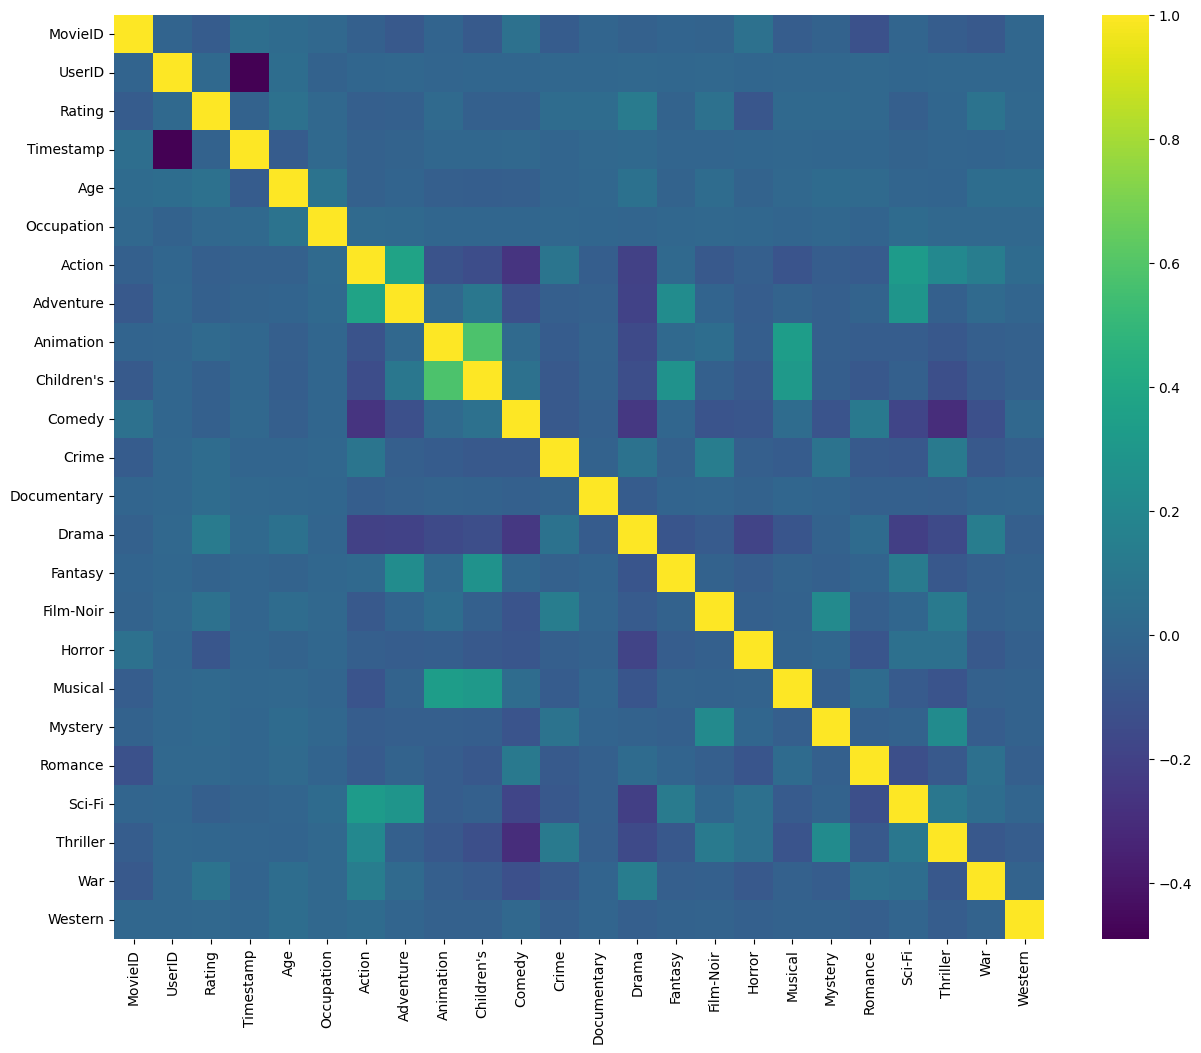

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,12))
sns.heatmap(Master_Data.corr(),cmap='viridis')

In [ ]:
#features affecting movie ratings
movie_features = Master_Data[['Age', 'Gender', 'Occupation', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
target_rating = Master_Data['Rating']

In [ ]:
movie_features['Gender']=movie_features['Gender'].map({'F':1,'M':0})

In [ ]:
movie_features.head()

,Age,Gender,Occupation,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,10,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,10,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,1,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,10,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,1,1,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# model to predict movie ratings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(movie_features, target_rating, test_size=0.3, random_state=42)
movie_rating_model = LinearRegression()
movie_rating_model.fit(X_train, y_train)
print("Accuracy on training set:", movie_rating_model.score(X_train, y_train))
print("Accuracy on test set:", movie_rating_model.score(X_test, y_test))


Accuracy on training set: 0.03816993670272062
Accuracy on test set: 0.03719702109308787
